<img src="files\Multiple Linear Regression with Python1.png"
     alt="Multiple Linear Regression with Python"
     style="float: left; margin-right: 10px;" />

____________________________________________________________________________________________________
# <span style="color:Purple">Hello this is, *Multiple Linear Regression with Python*</span>. 🤖💻
____________________________________________________________________________________________________

## Setting Up the Working Environment 🛠️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Datasets 📖

```python
from sklearn import datasets
```

In [2]:
from sklearn.datasets import load_boston

# ---------------------------------
import warnings
warnings.filterwarnings('ignore')

## The Working Dataset 🔎

In [3]:
# Setting X and y
X = load_boston().data
y = load_boston().target

In [4]:
# Transeform X into dataframe
boston = pd.DataFrame(X, columns = load_boston().feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Inserting the target variable (y) to the DataFrame
boston.insert(0, 'Price', y)
boston.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Using sklearn to build regression model 🧪

In [6]:
# Import LinearRegression from sklear.linear_model
from sklearn.linear_model import LinearRegression

In [7]:
# Instantiation/create a LinearRegression object
lm_reg = LinearRegression()

In [8]:
type(lm_reg)

sklearn.linear_model._base.LinearRegression

## Fitting Linear Regression

In [9]:
# Fit linear model
lm_reg.fit(X, y)

LinearRegression()

## Check the lm object ☑️

In [10]:
print([attr for attr in dir(lm_reg) if '_' and '__' not in attr])

['_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


## Checking the parameters ☑️

In [11]:
# Intercept
print('The model intercept value is {:.3f}'.format(lm_reg.intercept_))

The model intercept value is 36.459


In [12]:
# Coefficients
# zipping coefficients with their names
coefs = list(zip(boston.columns[1:], lm_reg.coef_))
coefs

[('CRIM', -0.10801135783679539),
 ('ZN', 0.04642045836687953),
 ('INDUS', 0.020558626367068917),
 ('CHAS', 2.6867338193448442),
 ('NOX', -17.766611228299986),
 ('RM', 3.8098652068092282),
 ('AGE', 0.0006922246403431768),
 ('DIS', -1.47556684560025),
 ('RAD', 0.30604947898516427),
 ('TAX', -0.012334593916574021),
 ('PTRATIO', -0.9527472317072921),
 ('B', 0.00931168327379375),
 ('LSTAT', -0.5247583778554881)]

In [13]:
# print the parameters (Coefficients)
for column_name, coef in coefs:
    print("The {0:7s} coefficient is: {1:8.4f}".format(column_name, coef))

The CRIM    coefficient is:  -0.1080
The ZN      coefficient is:   0.0464
The INDUS   coefficient is:   0.0206
The CHAS    coefficient is:   2.6867
The NOX     coefficient is: -17.7666
The RM      coefficient is:   3.8099
The AGE     coefficient is:   0.0007
The DIS     coefficient is:  -1.4756
The RAD     coefficient is:   0.3060
The TAX     coefficient is:  -0.0123
The PTRATIO coefficient is:  -0.9527
The B       coefficient is:   0.0093
The LSTAT   coefficient is:  -0.5248


## Saving the results into a table 💾

In [14]:
results = pd.DataFrame(coefs, columns = ["Variable", "Coefficient"])
results

,Variable,Coefficient
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Prediction 🏆



 - Syntax: 
```python
   y_pred = lm_reg.predict(new_data)
```

In [15]:
y_pred = lm_reg.predict(X) # I using the same data for educational purposes only

# The Goodness-of-Fit 🥇

## Model Performance
After learning how to fit a model, and how to do prediction, you need to a tool to measure the performance of your model. In linear regression problems, we have many metrics, and each metric has its strengths and its weaknesses; however, there are common ones used listed below:

### The model Scores
1. R^2 (Coefficient of Determination)
2. MAE (mean squared error)
3. RMSE (Root Mean Squared Error)

In [16]:
# Import the necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# print the R^2
print("The R^2 (Coefficient of Determination) of model is: {:.4f}".format(r2_score(y, y_pred)))

The R^2 (Coefficient of Determination) of model is: 0.7406


In [18]:
# The mean squared error
print("The Mean Squared Error of model is: {:.4f}".format(mean_squared_error(y, y_pred)))

The Mean Squared Error of model is: 21.8948


In [19]:
# The root mean squared error
# note: there is not found RMSE build in function in sklearn
print("The Root Mean Squared Error of model is: {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred))))

The Root Mean Squared Error of model is: 4.6792


In [20]:
# The mean Absolute error
print("The Mean Absolute Error of model is: {:.4f}".format(mean_absolute_error(y, y_pred)))

The Mean Absolute Error of model is: 3.2709


## Machine Learning Process
Building Machine Learning Models goes through several steps, which we mention here briefly:

1. Step 1: **Extracting features:** Datasets don't typically come naturally with clear features, so there's work to be done in reformatting the dataset. Additionally, you need to decide what features you want to begin with.


2. Step 2: **Dataset splitting:** split the dataset into two datasets: the test and train dataset.


3. Step 3: **Model Training:** Train the model on training set.


4. Step 4: **Model Evaluation:** The model has to be evaluated on the test set. Model evaluation is performed many times, not just once.

- In model evaluation, a threshold based on a calculate metric must be decided to in order to decide whether the model is useful and can be used in practice.
- If the model is not good, we need to move back to training step to tune the model, considering other solutions considering the inputs.
- We go back and forth between building and testing several times until we are satisfied about our model.

- If the model is not improving, maybe because of small dataset, or not enough features ... etc.

<img src="files\ML process.png"
     alt="ML process"
     style="float: left; margin-right: 10px;" />

# Train-Test and Model Validation 🗃️

## Splitting The Dataset Using sk-learn
- First, import **train_test_split()** **from sklearn.model selection**.

- Use the **train_test_split()** to randomly split the data.

### **train_test_split()** has few arguments:

- ***arrays:** This mean you pass first feature data, and the second the target data.
- **test_size** argument specifies what proportion of the original data is used for the test set (20%, 25%, 30% are common used proportions)
- **random_state** sets a seed for the random number generator that splits the data into train and test. Setting the seed with the same number allows us to reproduce the exact split so we get the same results.
- **shuffle** by default is **True**, which shuffles the data to ensure that data is not ordered in any way.
- **stratify** This is useful in classification problems. **Stratification** means the same proportion of **events** and **non-events** are the same in both train and test sets. (we will use it in comming lectures)

In [21]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [22]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 10121)

In [23]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## Model Training 🤖🦿

In [24]:
# Instantiation/create a LinearRegression object
lm = LinearRegression()

In [25]:
# fit the model on the training set
lm.fit(X_train, y_train)

LinearRegression()

## Prediction 🏆



 - Syntax: 
```python
   y_pred = lm_reg.predict(new_data)
```

In [26]:
# Predict on train set
pred_train = lm.predict(X_train)
# Predict on test set
pred_test = lm.predict(X_test)

## Model Evaluation 🥇

In [27]:
# The R^2 Score
print("The R^2 on the train set is: {:.4f}".format(r2_score(y_train ,pred_train)))

The R^2 on the train set is: 0.7404


In [28]:
# The R^2 Score
print("The R^2 on the test set is: {:.4f}".format(r2_score(y_test, pred_test)))

The R^2 on the test set is: 0.7246


In [29]:
print("The MSE on the train set is: {:.4f}".\
      format(mean_squared_error(y_train, pred_train)))

The MSE on the train set is: 19.8413


In [30]:
print("The MSE on the test set is: {:.4f}". \
      format(mean_squared_error(y_test, pred_test)))

The MSE on the test set is: 31.3415


In [31]:
print("The RMSE on the train set is: {:.4f}".format(np.sqrt(mean_squared_error(y_train, pred_train))))

The RMSE on the train set is: 4.4544


In [32]:
print("The RMSE on the test set is: {:.4f}".format(np.sqrt(mean_squared_error(y_test, pred_test))))

The RMSE on the test set is: 5.5984


## Model Diagnostics (Residual Plot) 📊📝

One of the tools of regression analysis diagnostics is __residual plot__. The residuals are the difference between the actual values and the predicted values:
$$resid= y - \hat y$$ or 
$$residuals = actual \ \ values - predicted \ \ values$$

 - **Residual plot**: is a graph that shows the **residuals** on the vertical axis and the **predicted values** on the horizontal axis.
 
 
 - If the points in a residual plot are randomly scattered around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
 
 
 - If there is some strucutre or pattern, that means your model is not capturing all the variances. There could be an interaction between variables, or time data where the time is not considered. If this is the case, the data must be examined again carefully.

In [33]:
# calculate the residuals
resid_train = y_train - pred_train
resid_test = y_test - pred_test

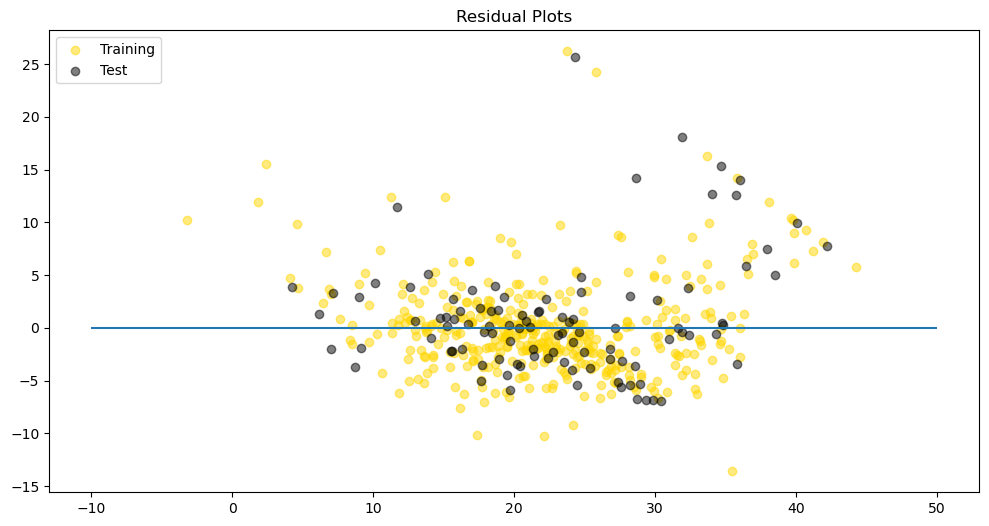

In [34]:
# Scatter plot the training data
plt.figure(figsize= (12, 6))
train = plt.scatter(x = pred_train, y = resid_train , c = 'gold', alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, resid_test , c = 'black', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin = -10, xmax = 50)

# Labels
plt.legend((train, test), ('Training','Test'), loc='upper left')
plt.title('Residual Plots')
plt.show()

It seems there is not an abvious pattern in the residual plot, and all the points are plotted above and below the horizontal line. 

## Problems are to be considered:

1. The model was tested only once and only a one portion of the data, so, is this the best technique? and is it the efficient technique to test the model?

Consider this case: 

   - If we split the data again to train and test data, are we going to have the same results?

2. We assumed the relationship is linear, which might not be the case, shouldn't we consider another non-linear algorithm!. 

3. We didn't consider any interactions between variables, but there might be some interactions.

4. No data transformation has been done. So, if we transform the features, we expect some improvement in the model.


All the previous questions should be taken under consideration to improve the model.

## Try to improve the model by coming back the step of building the model. 

In the next lecture, we will learn how to improve the predictive power of our models by learning new techniques about __tweaking or tuning__ the model's options. 

### Here are the topics of the next tutorial 

  1. K-fold Cross-Validation (CV)
  
  
  2. Data Transformation
     - Standardization
     - Normalization
     - Log Transformation
     
     
  3. Hyper-Parameter Tuning
  
     - Ridge Regression
     - Lasso Regression

__________________________________________________________________
# <span style="color:Purple">End The Project, *Thank you*</span> 🔚🥀
__________________________________________________________________